<a href="https://colab.research.google.com/github/lizjaimes/CCFraudANN/blob/main/CCFraudANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Reading the dataset

df = pd.read_csv("/content/fraudTrain.csv")
print(len(df.columns))
print (df)
# Preprocessing: Extract features from date and time columns
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['DayOfWeek'] = df['trans_date_trans_time'].dt.dayofweek

23
        Unnamed: 0 trans_date_trans_time        cc_num  \
0                0         1/1/2019 0:00  2.703190e+15   
1                1         1/1/2019 0:00  6.304230e+11   
2                2         1/1/2019 0:00  3.885950e+13   
3                3         1/1/2019 0:01  3.534090e+15   
4                4         1/1/2019 0:03  3.755340e+14   
...            ...                   ...           ...   
233954      233954        4/28/2019 4:01  4.149240e+15   
233955      233955        4/28/2019 4:02  1.800730e+14   
233956      233956        4/28/2019 4:03  3.546900e+15   
233957      233957        4/28/2019 4:04  3.885950e+13   
233958      233958        4/28/2019 4:04  6.759620e+11   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_

In [ ]:
df['Month'] = df['trans_date_trans_time'].dt.month
df['Hour'] = df['trans_date_trans_time'].dt.hour
# Preprocessing: Drop the original date and time columns
df.drop(columns=['trans_date_trans_time'], inplace=True)
 #Preprocessing: Handle missing values (replace with mean for simplicity)
df.fillna(df.mean(), inplace=True)

<ipython-input-2-31bbf890ca21>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
# Define the feature columns and target column
features = df.drop(columns=['is_fraud'])
target = df['is_fraud']

In [ ]:
# Preprocessing: Define transformers for numerical and categorical columns
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'DayOfWeek', 'Month', 'Hour']
categorical_features = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num']


In [ ]:
!pip install scikit-learn
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Preprocessing: Fit and transform the data
X = preprocessor.fit_transform(features)
y = target.values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the neural network model for binary classification
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

In [ ]:
# Compile the model with binary cross-entropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use the fit method with the validation_data argument
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_validation, y_validation))


Epoch 1/100
5849/5849 [==============================] - 5008s 856ms/step - loss: 0.0222 - accuracy: 0.9947 - val_loss: 0.0122 - val_accuracy: 0.9966
Epoch 2/100
5849/5849 [==============================] - 4793s 819ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0095 - val_accuracy: 0.9972
Epoch 3/100
5849/5849 [==============================] - 4791s 819ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.0098 - val_accuracy: 0.9970
Epoch 4/100
5849/5849 [==============================] - 2569s 439ms/step - loss: 0.0038 - accuracy: 0.9985 - val_loss: 0.0096 - val_accuracy: 0.9976
Epoch 5/100
5849/5849 [==============================] - 2549s 436ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0104 - val_accuracy: 0.9973
Epoch 6/100
   7/5849 [..............................] - ETA: 37:30 - loss: 0.0053 - accuracy: 0.9955    

KeyboardInterrupt: ignored

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


1463/1463 [==============================] - 12s 8ms/step - loss: 0.0103 - accuracy: 0.9973
Test Loss: 0.010331050492823124
Test Accuracy: 0.9973285794258118


In [ ]:
# Assuming you have already defined and trained your model (model)
# and have the test data in X_test.

# Make predictions on the test data
predictions = model.predict(X_test)

# The 'predictions' variable will now contain the predicted outputs for each test sample.


1463/1463 [==============================] - 8s 5ms/step


In [ ]:
print(predictions)


[[4.6844111e-09]
 [3.6647333e-07]
 [7.1461164e-13]
 ...
 [3.9088278e-11]
 [5.8647629e-09]
 [3.4799685e-10]]


In [ ]:
import numpy as np

# Assuming you have already trained the model and obtained predictions
predictions = model.predict(X_test)

# Custom threshold (e.g., 0.6) for classification
custom_threshold = 0.6

# Classify data as fraud (1) or non-fraud (0) based on the custom threshold
predicted_labels = np.where(predictions >= custom_threshold, 1, 0)


1463/1463 [==============================] - 12s 8ms/step


In [ ]:
print(predicted_labels)



[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, confusion_matrix

# Assuming you have already trained the model and obtained predictions
predictions = model.predict(X_test)

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

1463/1463 [==============================] - 19s 13ms/step


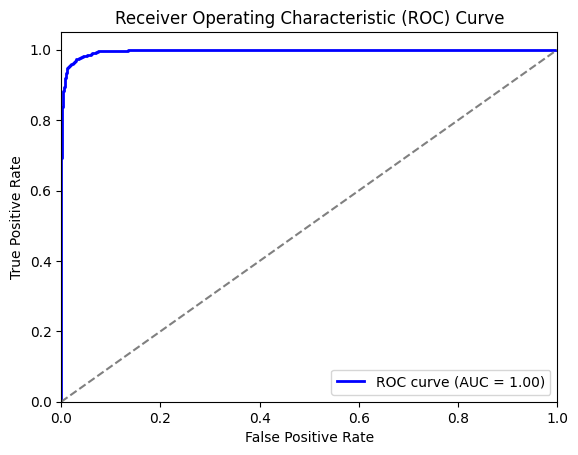

AUC Score: 0.9968892975093698
F1 Score: 0.7936507936507937


In [ ]:
# Calculate the F1 score
# Since the threshold for classifying data as fraud is not 0.5 anymore, we need to adjust the predictions
custom_threshold = 0.6
predicted_labels = np.where(predictions >= custom_threshold, 1, 0)
f1 = f1_score(y_test, predicted_labels)

# Display the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)
print("F1 Score:", f1)

In [ ]:
#import numpy as np

# Assuming you have already trained the model and obtained predictions
#predictions = model.predict(X_test)

# Define custom thresholds for each bucket (e.g., low, medium, and high confidence)
low_confidence_threshold = 0.2
medium_confidence_threshold = 0.6
high_confidence_threshold = 0.9

# Classify data into buckets based on the custom thresholds
bucket_low_confidence = np.where(predictions < low_confidence_threshold, 1, 0)
bucket_medium_confidence = np.where(
    (predictions >= low_confidence_threshold) & (predictions < medium_confidence_threshold),
    1,
    0,
)
bucket_high_confidence = np.where(predictions >= medium_confidence_threshold, 1, 0)

# Calculate the counts of fraud cases in each bucket
low_confidence_fraud_count = np.sum(y_test * bucket_low_confidence)
medium_confidence_fraud_count = np.sum(y_test * bucket_medium_confidence)
high_confidence_fraud_count = np.sum(y_test * bucket_high_confidence)

# Display the counts of fraud cases in each bucket
print("Low Confidence Fraud Count:", low_confidence_fraud_count)
print("Medium Confidence Fraud Count:", medium_confidence_fraud_count)
print("High Confidence Fraud Count:", high_confidence_fraud_count)


NameError: ignored